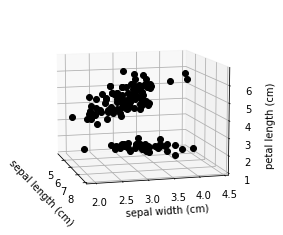

X_std shape:(150, 4)
X_pca shape:(150, 2)


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

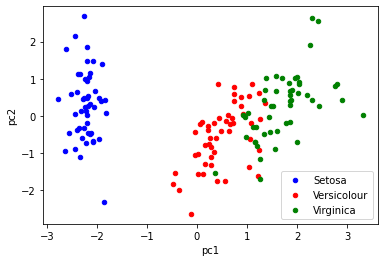

In [43]:
#AI-TECHGYM-1-6-Q-1
#教師なし学習 PCA

#データ加工・処理・分析ライブラリ
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#インポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#乳がんデータを読み込むためのインポート
from sklearn.datasets import load_iris

#乳がんデータの取得
iris = load_iris()

#三次元のグラフ
fig = plt.figure()
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d.set_xlabel(iris.feature_names[0])
ax_3d.set_ylabel(iris.feature_names[1])
ax_3d.set_zlabel(iris.feature_names[2])
ax_3d.view_init(elev=10., azim=-15)
ax_3d.plot(iris.data[:,0],iris.data[:,1],iris.data[:,2],marker="o",linestyle='None',color='black')
plt.show()

#標準化
sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

#主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

#属性表示
print('X_std shape:{}'.format(X_std.shape))
print('X_pca shape:{}'.format(X_pca.shape))

#列にラベルをつける、1つ目が第1主成分、2つ目が第2主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

#上のデータに、目的変数（cancer.target）を紐づける、横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(iris.target, columns=['target'])], axis=1)

#品種を分ける
pca_Setosa = X_pca[X_pca['target']==0]
pca_Versicolour = X_pca[X_pca['target']==1]
pca_Virginica = X_pca[X_pca['target']==2]

#悪性、良性をプロット
ax = pca_Setosa.plot.scatter(x='pc1', y='pc2', color='blue', label='Setosa')
pca_Versicolour.plot.scatter(x='pc1', y='pc2', color='red', label='Versicolour', ax=ax)
pca_Virginica.plot.scatter(x='pc1', y='pc2', color='green', label='Virginica', ax=ax)

In [41]:
display(pca_Versicolour.head())

,pc1,pc2,target
19,-2.343369,1.127849,1
20,-1.914323,0.408856,1
21,-2.207013,0.924121,1
37,-2.527332,0.592293,1
46,-2.384733,1.120430,1


In [42]:
display(pca_Virginica.head())

,pc1,pc2,target


In [46]:
display(df_SPDay.groupby(['cluster','SPDay_bin']).size().unstack())

SPDay_bin,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster,,,,,
0,10,0,0,0,0
1,386,6,7,2,15
2,6657,114,159,240,218
3,123,0,1,0,1
4,2807,49,48,83,71
5,1096,9,28,26,20


In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
